In [1]:
# importing all the libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


automobile


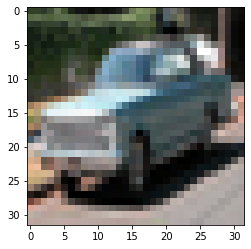

In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', ' horse', 'ship', 'truck']

class_number = 32
plt.imshow(x_train[class_number])
print(classes[y_train[class_number][0]])

In [4]:
# normalising the data
X_train, X_test = x_train / 255.0 , x_test / 255.0


# model creation

model = Sequential()

# 1st conv layer
model.add(Conv2D(36, 3, activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# 2nd conv layer
model.add(Conv2D(72, 3, activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# 3rd conv layer
model.add(Conv2D(72*2, 3, activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Flatten())

# hidden layer 1
model.add(Dense(128, activation = 'relu'))

# hidden layer 2
model.add(Dense(64, activation = 'sigmoid'))

# hidden layer 3
model.add(Dense(32, activation = 'sigmoid'))

# output
model.add(Dense(10, activation = 'softmax'))

In [5]:
model.compile('adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train , epochs = 50 , batch_size = 32 , validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 26s 10ms/step - loss: 1.8391 - accuracy: 0.3131 - val_loss: 1.4010 - val_accuracy: 0.4963
Epoch 2/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2457 - accuracy: 0.5594 - val_loss: 1.1709 - val_accuracy: 0.5851
Epoch 3/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0309 - accuracy: 0.6383 - val_loss: 1.0255 - val_accuracy: 0.6382
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8926 - accuracy: 0.6902 - val_loss: 0.9496 - val_accuracy: 0.6668
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7820 - accuracy: 0.7310 - val_loss: 0.8805 - val_accuracy: 0.6967
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6975 - accuracy: 0.7641 - val_loss: 0.8793 - val_accuracy: 0.6992
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6201 - accuracy: 0.7893 - val_loss: 0.8890 - v

In [6]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5814 - accuracy: 0.7015


[1.5814415216445923, 0.7014999985694885]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


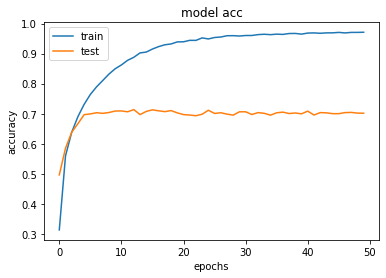

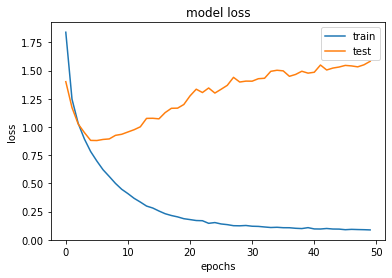

In [7]:
# visulaise the important graphs
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()